In [3]:
%matplotlib inline
import pymc3 as pm
from pymc3.ode import DifferentialEquation
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import arviz as az
import theano
import ODE_models
import pandas as pd
import scipy.integrate as integrate
from scipy.integrate import quad
plt.style.use('seaborn-darkgrid')

The New York Data came from:
https://www1.nyc.gov/site/doh/covid/covid-19-data.page

In [4]:

r_newyorkTSV = '../../newyork.tsv'
w_newyorkTSV = '../../newyork.tsv'
tsv_readny = pd.read_csv("newyork.tsv", sep='\t')
cumulativeny = tsv_readny['confirmed'] #is this what I want?


In [5]:
recovery_days = 7 # average length of infection (current baseline from 2012)
gamma = 1/recovery_days # rate of recovery

beta_S = 0.31 # infection rate for symptomatic infectives
beta_A = 0.37 # infection rate for asymptomatic infectives

q = .80209   # reduction factor for those with altered/adjusted behavior
p = 2/3   # probability of developing symptoms

   # average length of memory regarding active cases
nu  = 1/7  # rate of forgetting past "new case" counts

M_thresh = 0.01 # risk threshold 
m = 1/M_thresh

rho = 10 # speed of behavioral changes (1/days)

mu = 10**(-8)  # irrational exploration with fixed units


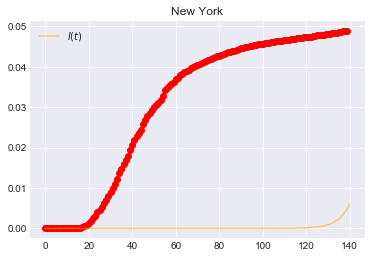

In [6]:
params = ODE_models.get_params(gamma,beta_S, beta_A, q, p, nu, m, rho, mu)
## Set initial conditions
Nny= 8.399e6
yobsny = cumulativeny/Nny
Sn_0ny  = 1-(0.005+yobsny[1]/Nny)
Sa_0  = 0.005
IS_0ny  = yobsny[1]/Nny
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0.01

#newyork
initial_stateny = np.array([Sn_0ny,Sa_0,IS_0ny,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
timeny = np.arange(0,140,.001)
timeobsny = np.arange(0,140,1)
sim_systemny = odeint(ODE_models.SIRan_system, initial_stateny, timeny, args=(params,))



yny =1-(sim_systemny[:,0]+sim_systemny[:,1])




plt.plot(timeobsny,yobsny, color= 'red',marker='o', linestyle='none')
plt.plot(timeny, yny, color='orange', alpha=0.5, label=f'$I(t)$')
plt.legend()
plt.title('New York')
plt.show()



In [37]:
#Least squares method
yny =1-(sim_systemny[:,0]+sim_systemny[:,1])
yobsny = np.array(cumulativeny/Nny)
ypred = np.zeros(140)
for i in range(0,140):
    ind = np.where(timeny ==i)
    ypred[i] = yny[ind]
    
SE = (ypred-yobsny)**2
sumSE = sum(SE)

In [ ]:
#California

r_californiaTSV = '../../california.tsv'
w_californiaTSV = '../../california.tsv'
tsv_read = pd.read_csv("california.tsv", sep='\t')
cumulativeca = tsv_read['confirmed'] #is this what I want?
california_pop = 39.51e6
Nca = california_pop
Sn_0  = 1-(Sa_0+yobsca[1]/Nca)
Sa_0  = 0.005
IS_0  = yobsca[1]/Nca
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0.01
# Simulate the ODE
initial_state = np.array([Sn_0,Sa_0,IS_0,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
time = np.arange(0,176,.001)
timeobs = np.arange(0,176,1)
sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params,))

y =1-(sim_system[:,0]+sim_system[:,1]) #take the integral of this from start to current time
    
yobsca = cumulativeca/Nca
plt.plot(timeobs,yobsca, marker='o', linestyle='none')
plt.plot(time, y, color='C0', alpha=0.5, label=f'$I(t)$')
plt.legend()
plt.title('California Cumulative')
plt.show()


In [36]:
SE

array([1.41757072e-14, 1.41757060e-14, 5.67028304e-14, 1.71526090e-12,
       6.86104370e-12, 2.74441751e-11, 1.12285802e-10, 1.59278282e-10,
       2.85839025e-10, 4.24264837e-10, 6.67520028e-10, 1.50653780e-09,
       2.51251710e-09, 5.27478187e-09, 7.59568589e-09, 1.27935787e-08,
       2.68009526e-08, 8.07699239e-08, 2.45437132e-07, 7.17216800e-07,
       1.52470599e-06, 3.26998691e-06, 6.19149960e-06, 9.36582982e-06,
       1.55470077e-05, 2.16254344e-05, 2.83826717e-05, 4.06002172e-05,
       5.06640900e-05, 6.45957363e-05, 8.23341786e-05, 1.00892565e-04,
       1.23556763e-04, 1.52408858e-04, 1.90626696e-04, 2.18264652e-04,
       2.52223106e-04, 2.84644585e-04, 3.24381585e-04, 3.72192711e-04,
       4.23431434e-04, 4.74678487e-04, 5.19448082e-04, 5.55592997e-04,
       5.97915741e-04, 6.68320063e-04, 7.22508022e-04, 7.71521883e-04,
       8.20213035e-04, 8.63033138e-04, 8.97415819e-04, 9.28525872e-04,
       9.70041741e-04, 1.01763959e-03, 1.08155541e-03, 1.16683365e-03,
      